## July 08 2021

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_time = time.time()
df = pd.read_feather('CW02_dataset.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 11.054124593734741


In [3]:
df['user_id'].value_counts().head(10)

294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490    1916
30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81    1450
bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894    1432
ffdf9befcb504df830c42234efbaeb9574cb4e185789b265341919841a64209a    1429
c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00    1421
4151c284aa005431332b16db176458d352ea8f4fef80b1c8b2f5fd239acca56d    1419
14b2d99290788c438c269441f067becc6bff5d4c51540b864cab114dd701f27d    1417
d0b635828debbc2f302abcc978f3823533b8d17785cebe3fa91bba3fca631888    1416
32fdaeac448827686c10428e2cb728652789bd8bb94aada037ba942dec41aa71    1416
9a3cac5ca9c94250c64500bd07596e30777a34abcb78a7a7281003d02de8e045    1415
Name: user_id, dtype: int64

In [4]:
def latency(user_id, freq='24H'):
    '''
    Plot latency score by user id
    
    user_id : str = user id from the dataframe
    freq : str = 3H, 6H, 12H, or 24H. H=hour
    
    How to call this function -> user = latency(user_id, freq)
    '''

    user = df[df['user_id'] == user_id]
    user = user.reset_index(drop=True)
    user = user.set_index('date_time').sort_index()
    user['speed_id'] = user['speed_id'].replace('', np.nan)
    user = user.replace({np.nan: None})
    user = user.dropna()
    
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 10), sharex=True, sharey=True)
    fig.tight_layout()
    
    # ax[0]
    ax[0].set_title('Internal Latency Score. Freq={}'.format(freq))
    sns.lineplot(ax=ax[0], x='date_time', y='int_latency_score', data=user.groupby(pd.Grouper(freq=freq)).mean().round())
    ax[0].axvline(user['reportdate'].unique(), color='red')
    ax[0].legend(['Report date: {}'.format(user['reportdate'].unique())], handlelength=0, loc=1)
    ax[0].set_ylabel('Score')
    
    # ax[1]
    ax[1].set_title('External Latency Score. Freq={}'.format(freq))
    sns.lineplot(ax=ax[1], x='date_time', y='ext_latency_score', data=user.groupby(pd.Grouper(freq=freq)).mean().round())
    ax[1].axvline(user['reportdate'].unique(), color='red')
    ax[1].set_ylabel('Score')

    # ax[2]
    ax[2].set_title('Internal and External Latency Score. Freq={}'.format(freq))
    sns.lineplot(ax=ax[2], x='date_time', y='int_latency_score', data=user.groupby(pd.Grouper(freq=freq)).mean().round(), label='int_latency_score')
    sns.lineplot(ax=ax[2], x='date_time', y='ext_latency_score', data=user.groupby(pd.Grouper(freq=freq)).mean().round(), label='ext_latency_score')
    ax[2].axvline(user['reportdate'].unique(), color='red')
    ax[2].set_ylabel('Score')
    
    # ax[3]
    ax[3].set_title('FIrst Data Latency Score. Freq={}'.format(freq))
    sns.lineplot(ax=ax[3], x='date_time', y='fd_latency_score', data=user.groupby(pd.Grouper(freq=freq)).mean().round())
    ax[3].axvline(user['reportdate'].unique(), color='red')
    ax[3].set_ylabel('Score')
    ax[3].set_xlabel('Date')
    fig.show()
    
    return user

Time elapsed: 1.2137463092803955


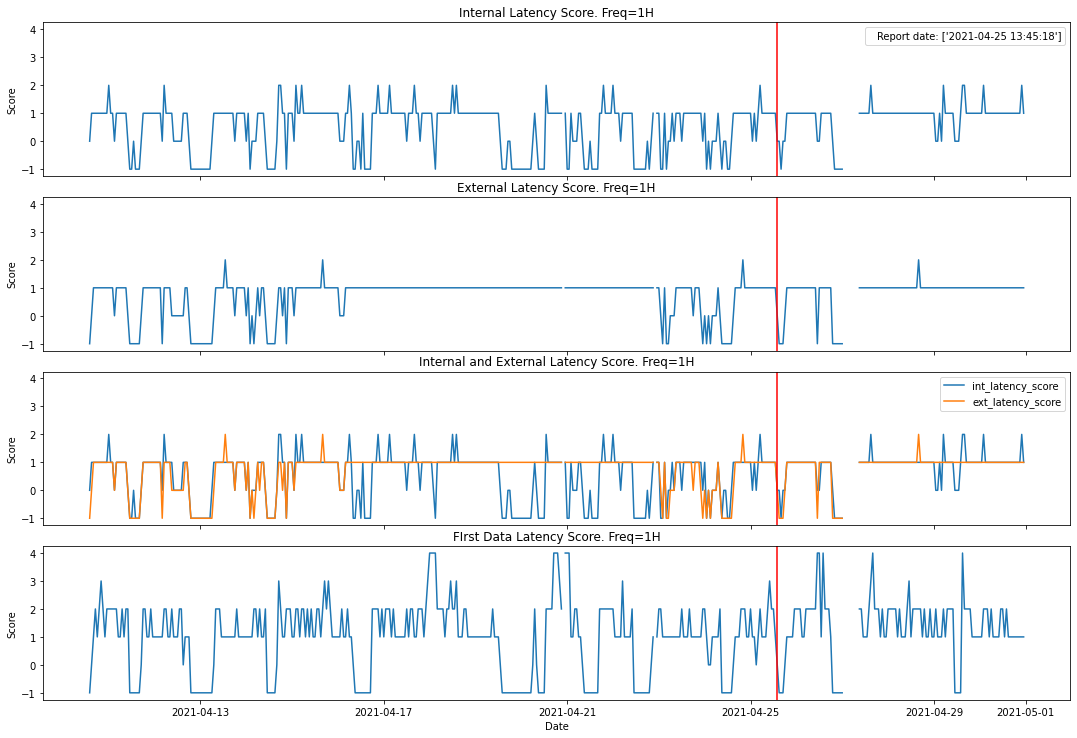

In [5]:
start_time = time.time()

user = latency(user_id='294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490', freq='1H')

print('Time elapsed: {}'.format((time.time() - start_time)))

In [6]:
user.head()

,user_id,reportdate,reg,cwitel,speed_id,lcat,device_count,apps_count,avg_activity_sec,avg_volume_in,...,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,bin_1h,bin_3h,bin_6h,bin_24h
date_time,,,,,,,,,,,,,,,,,,,,,
2021-04-10 14:00:00,294f89e27932bafefe58160c1caab293759050bddfa8dc...,2021-04-25 13:45:18,1,2,20M,Residensial,1,4,75.000000,716.250,...,-1,-1,2,-1,1,1,-360.0,-120.0,-60.0,-15.0
2021-04-10 14:30:00,294f89e27932bafefe58160c1caab293759050bddfa8dc...,2021-04-25 13:45:18,1,2,20M,Residensial,1,5,182.000000,829.800,...,-1,-1,2,1,1,1,-360.0,-120.0,-60.0,-15.0
2021-04-10 15:00:00,294f89e27932bafefe58160c1caab293759050bddfa8dc...,2021-04-25 13:45:18,1,2,20M,Residensial,1,4,122.500000,1032.250,...,-1,-1,1,1,1,1,-359.0,-120.0,-60.0,-15.0
2021-04-10 15:30:00,294f89e27932bafefe58160c1caab293759050bddfa8dc...,2021-04-25 13:45:18,1,2,20M,Residensial,3,33,137.058824,35785.500,...,1,1,1,1,1,2,-359.0,-120.0,-60.0,-15.0
2021-04-10 16:00:00,294f89e27932bafefe58160c1caab293759050bddfa8dc...,2021-04-25 13:45:18,1,2,20M,Residensial,3,36,395.250000,974425.275,...,1,1,1,2,1,3,-358.0,-120.0,-60.0,-15.0


In [7]:
def percentage(score_name):
    '''
    Creates subplots of percentage/proportion of score 4 and score -1 in the dataframe in 1-hour, 3-hour, and 6-hour interval.
    score_name: str = score variables in the dataframe
    
    How to call this function -> df1, df3, df6 = percentage(score_name)
    '''
    
    cols = ['hour', 'score_4_percentage', 'score_min1_percentage']
    sns.set_style('whitegrid')
    sns.set_palette('summer')
    
    # One hour interval
    df1 = pd.DataFrame(columns=cols)
    df1['hour'] = [i for i in range(0, 24)]
    df1.set_index('hour', inplace=True)
    for n in range(0, 24):
        df1['score_4_percentage'].loc[n] = round(df[df['date_time'].dt.hour == n].loc[df[score_name] == 4, score_name].count() / df[score_name][df['date_time'].dt.hour == n].count() * 100, 3)
        df1['score_min1_percentage'].loc[n] = round(df[df['date_time'].dt.hour == n].loc[df[score_name] == -1, score_name].count() / df[score_name][df['date_time'].dt.hour == n].count() * 100, 3)
    
    # Three hour interval
    df3 = pd.DataFrame(columns=cols)
    df3['hour'] = ['0-230', '3-530', '6-830', '9-1130', '12-1430', '15-1730', '18-2030', '21-2330']
    df3.set_index('hour', inplace=True)
    for n1, n2, n3 in zip(range(0, 8), range(0, 24, 3), range(3, 28, 3)):
        df3['score_4_percentage'].iloc[n1] = round(df[(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].loc[df[score_name] == 4, score_name].count() / df[score_name][(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].count() * 100, 3)
        df3['score_min1_percentage'].iloc[n1] = round(df[(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].loc[df[score_name] == -1, score_name].count() / df[score_name][(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].count() * 100, 3)
    
    # Six hour interval
    df6 = pd.DataFrame(columns=cols)
    df6['hour'] = ['0-530', '6-1130', '12-1730', '18-2330']
    df6.set_index('hour', inplace=True)
    for n1, n2, n3 in zip(range(0, 5), range(0, 24, 6), range(6, 28, 6)):
        df6['score_4_percentage'].iloc[n1] = round(df[(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].loc[df[score_name] == 4, score_name].count() / df[score_name][(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].count() * 100, 3)
        df6['score_min1_percentage'].iloc[n1] = round(df[(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].loc[df[score_name] == -1, score_name].count() / df[score_name][(df['date_time'].dt.hour >= n2) & (df['date_time'].dt.hour < n3)].count() * 100, 3)
    
    
    # Plot(s)
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
    
    # 1
    sns.barplot(ax=ax[0, 0], data=df1.reset_index(), x='hour', y='score_4_percentage', palette='summer')
    ax[0, 0].set_title('{} =4 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 0].set_ylabel('')
    ax[0, 0].set_xlabel('')

    sns.barplot(ax=ax[0, 1], data=df1.reset_index(), x='hour', y='score_min1_percentage', palette='summer')
    ax[0, 1].set_title('{} =-1 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 1].set_ylabel('')
    ax[0, 1].set_xlabel('')

    # 3
    sns.barplot(ax=ax[1, 0], data=df3.reset_index(), x='hour', y='score_4_percentage', palette='summer')
    ax[1, 0].set_title('{} =4 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 0].set_ylabel('Percentage (%)')
    ax[1, 0].set_xlabel('')

    sns.barplot(ax=ax[1, 1], data=df3.reset_index(), x='hour', y='score_min1_percentage', palette='summer')
    ax[1, 1].set_title('{} =-1 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 1].set_ylabel('')
    ax[1, 1].set_xlabel('')
    
    # 6
    sns.barplot(ax=ax[2, 0], data=df6.reset_index(), x='hour', y='score_4_percentage', palette='summer')
    ax[2, 0].set_title('{} =4 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 0].set_ylabel('')

    sns.barplot(ax=ax[2, 1], data=df6.reset_index(), x='hour', y='score_min1_percentage', palette='summer')
    ax[2, 1].set_title('{} =-1 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 1].set_ylabel('')
    
    fig.show()
    
    return df1, df3, df6

Time elapsed: 43.66536498069763


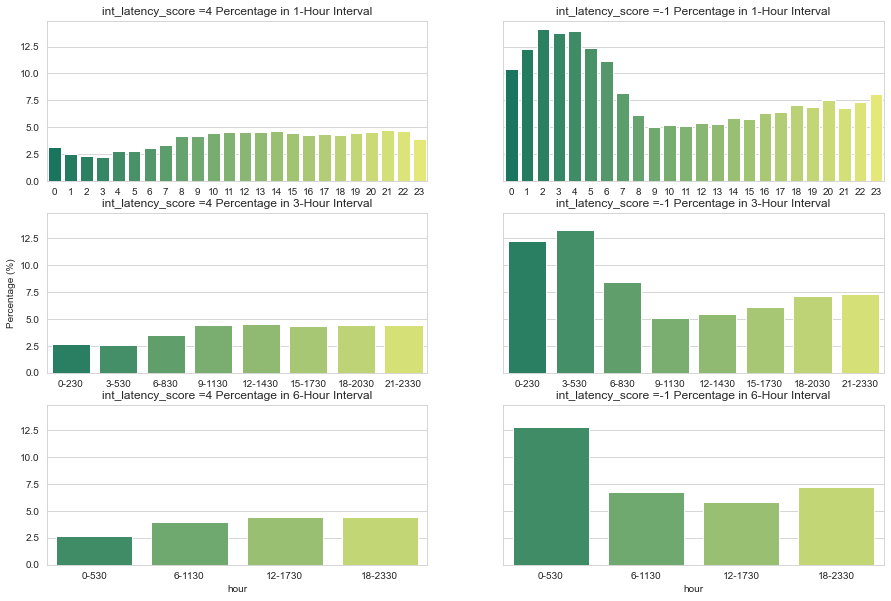

In [8]:
start_time = time.time()

df1, df3, df6 = percentage('int_latency_score')

print('Time elapsed: {}'.format((time.time() - start_time)))

In [9]:
df1.head()

,score_4_percentage,score_min1_percentage
hour,,
0,3.148,10.403
1,2.528,12.267
2,2.374,14.146
3,2.283,13.755
4,2.757,13.897


In [10]:
df3

,score_4_percentage,score_min1_percentage
hour,,
0-230,2.684,12.268
3-530,2.624,13.325
6-830,3.568,8.452
9-1130,4.417,5.129
12-1430,4.592,5.522
15-1730,4.36,6.168
18-2030,4.435,7.142
21-2330,4.443,7.379


In [11]:
df6

,score_4_percentage,score_min1_percentage
hour,,
0-530,2.654,12.795
6-1130,4.0,6.759
12-1730,4.477,5.843
18-2330,4.439,7.258


In [12]:
def percentage_bin136(user_id, score_name):
    '''
    Creates subplots of percentage/proportion of score 4 and score -1 in the dataframe in 1-hour, 3-hour, and 6-hour interval before or after the reportdate.
    
    user_id: str = user id
    score_name: str = score variables in the dataframe
    
    How to call this function -> df1, df3, df6 = percentage_bin136(user_id, score_name)
    '''
    sns.set_style('whitegrid')
    sns.set_palette('summer')
    
    ## Dataframe(s)
    # 1-hour interval
    bin1 = df[['bin_1h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_1h'] >= -48) & (df['bin_1h'] <= 24) & (df['user_id'] == user_id)]
    bin1 = bin1.sort_values('bin_1h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df1 = pd.DataFrame(columns=['bin_1h', 'score_4_percentage', 'score_min1_percentage'])
    df1['bin_1h'] = [i for i in range(-48, 25)]
    df1.set_index('bin_1h', inplace=True)
    for n in range(-48, 25):
        df1['score_4_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 4, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_min1_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == -1, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
    
    # 3-hour interval
    bin3 = df[['bin_3h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_3h'] >= -16) & (df['bin_3h'] <= 8) & (df['user_id'] == user_id)]
    bin3 = bin3.sort_values('bin_3h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df3 = pd.DataFrame(columns=['bin_3h', 'score_4_percentage', 'score_min1_percentage'])
    df3['bin_3h'] = [i for i in range(-16, 9)]
    df3.set_index('bin_3h', inplace=True)
    for n in range(-16, 9):
        df3['score_4_percentage'].loc[n] = round(bin3[bin3['bin_3h'] == n].loc[bin3[score_name] == 4, score_name].count() / bin3[score_name][bin3['bin_3h'] == n].count() * 100, 3)
        df3['score_min1_percentage'].loc[n] = round(bin3[bin3['bin_3h'] == n].loc[bin3[score_name] == -1, score_name].count() / bin3[score_name][bin3['bin_3h'] == n].count() * 100, 3)
      
    # 6-hour interval
    bin6 = df[['bin_6h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_6h'] >= -8) & (df['bin_6h'] <= 4) & (df['user_id'] == user_id)]
    bin6 = bin6.sort_values('bin_6h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df6 = pd.DataFrame(columns=['bin_6h', 'score_4_percentage', 'score_min1_percentage'])
    df6['bin_6h'] = [i for i in range(-8, 5)]
    df6.set_index('bin_6h', inplace=True)
    for n in range(-8, 5):
        df6['score_4_percentage'].loc[n] = round(bin6[bin6['bin_6h'] == n].loc[bin6[score_name] == 4, score_name].count() / bin6[score_name][bin6['bin_6h'] == n].count() * 100, 3)
        df6['score_min1_percentage'].loc[n] = round(bin6[bin6['bin_6h'] == n].loc[bin6[score_name] == -1, score_name].count() / bin6[score_name][bin6['bin_6h'] == n].count() * 100, 3)
      
    
    
    ## Plot(s)
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
    ax[0, 0].set_ylim([-5, 105])

    # 1-hour interval
    sns.scatterplot(ax=ax[0, 0], data=df1.reset_index(), x='bin_1h', y='score_4_percentage', palette='summer') 
    ax[0, 0].set_title('{} =4 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 0].axvline(0, color='red')
    ax[0, 0].set_ylabel('')
    ax[0, 0].set_xlabel('bin_1h')
    ax[0, 0].set_xlim([-53, 29])
    ax[0, 0].set_xticks([-48, -36, -24, -12, 0, 12, 24])

    sns.scatterplot(ax=ax[0, 1], data=df1.reset_index(), x='bin_1h', y='score_min1_percentage', palette='summer')
    ax[0, 1].set_title('{} =-1 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 1].axvline(0, color='red')
    ax[0, 1].set_ylabel('')
    ax[0, 1].set_xlabel('bin_1h')
    ax[0, 1].set_xlim([-53, 29])
    ax[0, 1].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    # 3-hour interval
    sns.scatterplot(ax=ax[1, 0], data=df3.reset_index(), x='bin_3h', y='score_4_percentage', palette='summer') 
    ax[1, 0].set_title('{} =4 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 0].axvline(0, color='red')
    ax[1, 0].set_ylabel('Percentage (%)')
    ax[1, 0].set_xlabel('bin_3h')
    ax[1, 0].set_xlim([-18, 10])
    ax[1, 0].set_xticks([-16, -8, 0, 8])

    sns.scatterplot(ax=ax[1, 1], data=df3.reset_index(), x='bin_3h', y='score_min1_percentage', palette='summer')
    ax[1, 1].set_title('{} =-1 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 1].axvline(0, color='red')
    ax[1, 1].set_ylabel('')
    ax[1, 1].set_xlabel('bin_3h')
    ax[1, 1].set_xlim([-18, 10])
    ax[1, 1].set_xticks([-16, -8, 0, 8])
    
    # 6-hour interval
    sns.scatterplot(ax=ax[2, 0], data=df6.reset_index(), x='bin_6h', y='score_4_percentage', palette='summer') 
    ax[2, 0].set_title('{} =4 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 0].axvline(0, color='red')
    ax[2, 0].set_ylabel('')
    ax[2, 0].set_xlabel('bin_6h')
    ax[2, 0].set_xlim([-10, 6])
    ax[2, 0].set_xticks([-8, -4, 0, 4])

    sns.scatterplot(ax=ax[2, 1], data=df6.reset_index(), x='bin_6h', y='score_min1_percentage', palette='summer')
    ax[2, 1].set_title('{} =-1 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 1].axvline(0, color='red')
    ax[2, 1].set_ylabel('')
    ax[2, 1].set_xlabel('bin_6h')
    ax[2, 1].set_xlim([-10, 6])
    ax[2, 1].set_xticks([-8, -4, 0, 4])
    
    fig.subplots_adjust(hspace=0.4)
    fig.show()
    
    return df1, df3, df6

Time elapsed: 3.2906947135925293


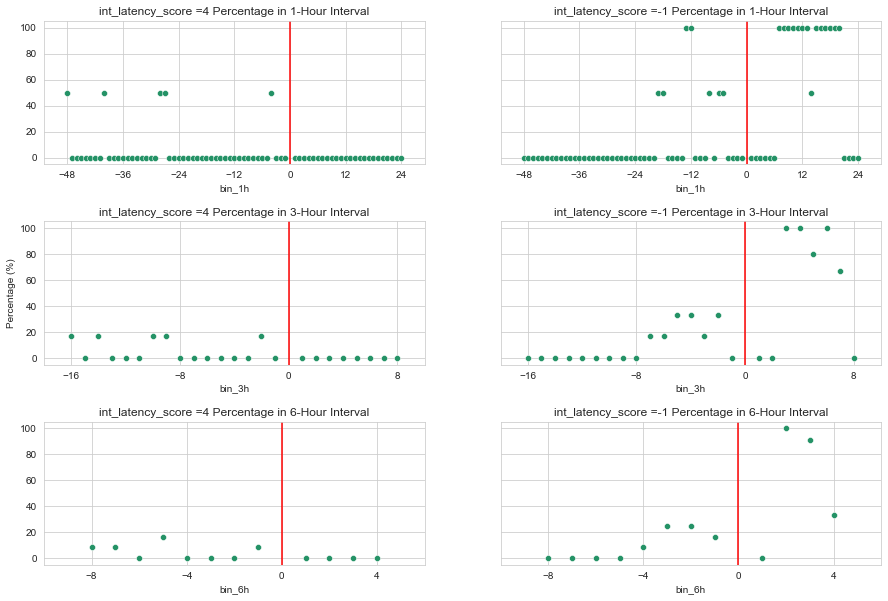

In [13]:
start_time = time.time()

df1, df3, df6 = percentage_bin136(user_id='30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81', score_name='int_latency_score')

print('Time elapsed: {}'.format((time.time() - start_time)))

In [14]:
df1.head()

,score_4_percentage,score_min1_percentage
bin_1h,,
-48,50.0,0.0
-47,0.0,0.0
-46,0.0,0.0
-45,0.0,0.0
-44,0.0,0.0


In [15]:
df3.head()

,score_4_percentage,score_min1_percentage
bin_3h,,
-16,16.667,0.0
-15,0.0,0.0
-14,16.667,0.0
-13,0.0,0.0
-12,0.0,0.0


In [16]:
df6.head()

,score_4_percentage,score_min1_percentage
bin_6h,,
-8,8.333,0.0
-7,8.333,0.0
-6,0.0,0.0
-5,16.667,0.0
-4,0.0,8.333


## July 12 2021

In [5]:
def hmin3_func(user_id):
    lst = []
    for n in [1, 2, 3, 4, -1]:
        a = round(df[
                    (df['user_id'] == user_id) &
                    (df['bin_3h'] == -1)
                    ].loc[df['int_latency_score'] == n, 'int_latency_score'].count()
                  /
                  df['int_latency_score'][
                    (df['user_id'] == user_id) &
                    (df['bin_3h'] == -1)
                ].count() * 100, 2)
        lst.append(a)
    
    return {
        'user_id': user_id,
        'score_1_perc': lst[0],
        'score_2_perc': lst[1],
        'score_3_perc': lst[2],
        'score_4_perc': lst[3],
        'score_min1_perc': lst[4]
    }

In [6]:
hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc', 'score_min1_perc'])
u = ['bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894', '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490']

for user in u:
    hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)
    
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,50.0,16.67,16.67,16.67,0.0
1,294f89e27932bafefe58160c1caab293759050bddfa8dc...,100.0,0.00,0.00,0.00,0.0


This function would take a long time for 1000 user: more than 1 hour (local machine). Suggestion: save to csv after the code done running